In [5]:
import numpy as np
from numpy import quantile, where, random
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM, SVC
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
# This line is only needed if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_wine, make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

In [2]:
n_jets = 100
jet_size = 5
n_features = 3

data = np.zeros((n_jets, jet_size, n_features))
for jet_idx in range(n_jets):
    data[jet_idx] = np.random.random((jet_size, n_features))


In [3]:
print(np.shape(data))
print(train[:3])

(100, 5, 3)
[[[0.37029158 0.1961048  0.31492975]
  [0.94289321 0.16826186 0.08341796]
  [0.81019053 0.25907643 0.3304049 ]
  [0.51031137 0.53956709 0.63874142]
  [0.2819018  0.89477896 0.28128888]]

 [[0.47030871 0.67668636 0.88087812]
  [0.04876965 0.58906327 0.46049418]
  [0.85477422 0.2293123  0.60612704]
  [0.76628738 0.02999334 0.84049206]
  [0.21765845 0.76914188 0.47570133]]

 [[0.27412462 0.65201689 0.24299675]
  [0.5552602  0.30448934 0.76418792]
  [0.47163442 0.45899544 0.49536343]
  [0.32974884 0.10510704 0.67615115]
  [0.13140908 0.73784469 0.21988743]]]


In [6]:
### TEST, dont use ###
X_train, y = make_circles(n_samples=500, noise=0.2,
                          factor=0.4,
                          random_state=4)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
train_scaled = data_scaled[:90]
test_scaled = data_scaled[90:]    


ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [32]:
def sk_train_plot(model, X1, y=None, ax=plt):
    # fit (train) and predict the data, if y
    X1 = X1.reshape([100,15])[:,:2]
    print(np.shape(X1))
    model.fit(X1, y, sample_weight=None) # TODO figure out sample_weight
    pred = model.predict(X1)
    
    # meshgrid for plots
    xx1, yy1 = np.meshgrid(np.linspace(X1[:,0].min(), X1[:,0].max(), 500),
                        np.linspace(X1[:,1].min(), X1[:,1].max(), 500))
    
    # decision function
    Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    
    # plot data and decision function
    ax.scatter(X1[:, 0], X1[:, 1], c=y, cmap=plt.cm.viridis, alpha=0.25)
    ax.contour( xx1, yy1, Z1, levels=(-1,0,1), linewidths=(1, 1, 1),
                linestyles=('--', '-', '--'), colors=('b','k', 'r'))
    
    
    
    # Plot support vectors (non-zero alphas)
    # as circled points (linewidth > 0)
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c=y[model.support_],
                cmap=plt.cm.viridis, lw=1, edgecolors='k')
    
    return

(100, 2)


TypeError: 'NoneType' object is not subscriptable

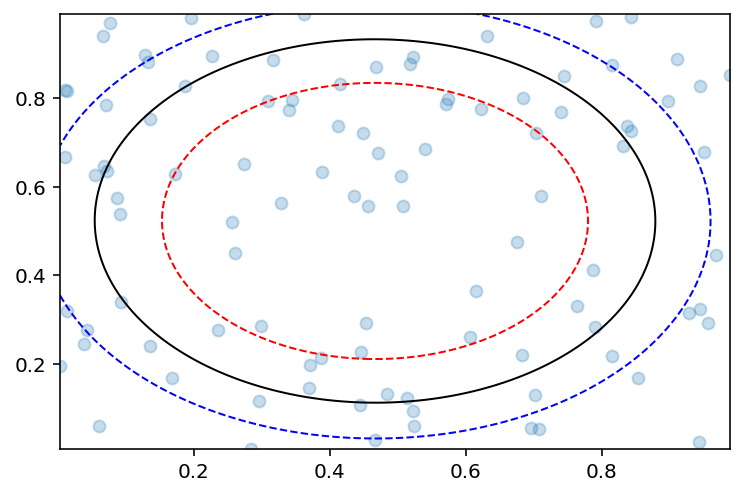

In [33]:
model = OneClassSVM(nu=0.5, gamma=0.35, kernel='rbf')
sk_train_plot(model, data)

In [16]:
np.shape(data)

(100, 5, 3)